## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

## Load The Dataset

In [2]:
df = pd.read_excel("./Output1.xlsx")
df.shape

(74303, 22)

In [3]:
df.columns

Index(['year', 'type_of_violence', 'side_a', 'side_b', 'number_of_sources',
       'source_article', 'source_office', 'source_date', 'where_coordinates',
       'latitude', 'longitude', 'country', 'region', 'date_start', 'date_end',
       'deaths_a', 'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best',
       'high', 'low'],
      dtype='object')

In [4]:
df.head()

,year,type_of_violence,side_a,side_b,number_of_sources,source_article,source_office,source_date,where_coordinates,latitude,...,region,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low
0,2018,State,Government of Turkey,PKK,1,"""National Iraqi News Agency,2018-05-30,Turkey ...",National Iraqi News Agency,2018-05-30,Tunceli province,39.083333,...,Middle East,2018-05-30,2018-05-30,0,1,0,0,1,1,1
1,2018,State,Government of Turkey,PKK,1,"""Sputnik News Service,2018-08-15,Turkish Force...",Sputnik News Service,2018-08-15,Van province,38.407357,...,Middle East,2018-08-15,2018-08-15,0,1,0,0,1,1,1
2,2018,State,Government of Turkey,PKK,1,"""People’s Defense Forces,2018-07-02,http://hpg...",People’s Defense Forces,2018-07-02,Şırnak province,37.449444,...,Middle East,2018-07-02,2018-07-02,0,1,0,0,1,1,1
3,2018,State,Government of Turkey,PKK,1,"""People’s Defense Forces,2018-02-02,View Arara...",People’s Defense Forces,2018-02-02,Osmaniye province,37.228056,...,Middle East,2018-02-02,2018-02-02,0,1,0,0,1,1,1
4,2018,State,Government of Turkey,PKK,1,"""People’s Defense Forces,2018-11-01,http://hpg...",People’s Defense Forces,2018-11-01,Batman province,38.081944,...,Middle East,2018-11-01,2018-11-01,0,1,0,0,1,1,1


## Reorganize and Group The Dataset

In [5]:
country_df = df.groupby(['country']).agg({'deaths_a': ['sum', 'min', 'max', 'mean'], 'deaths_b': ['sum', 'min', 'max', 'mean'], 'deaths_unknown': ['sum', 'min', 'max', 'mean'], "best": ['sum', 'min', 'max', 'mean']})
country_df.head()

deaths_a                     deaths_b                     \
                 sum min   max      mean      sum min  max      mean   
country                                                                
Afghanistan    18528   0  1562  1.113462    88190   0  292  5.299880   
Algeria           30   0     7  0.666667       71   0    8  1.577778   
Angola             1   0     1  0.015873       18   0    2  0.285714   
Armenia           42   0    14  1.555556      125   0   35  4.629630   
Australia          0   0     0  0.000000        1   0    1  0.500000   

            deaths_unknown                       best                      
                       sum min  max      mean     sum min   max      mean  
country                                                                    
Afghanistan           1640   0  144  0.098558  116089   0  1562  6.976502  
Algeria                  1   0    1  0.022222     110   0    11  2.444444  
Angola                  48   0   19  0.761905     112   0    19  1.777778  
Armenia                  2   0    2  0.074074     177   1    49  6.555556  
Australia                0   0    0  0.000000       2   1     1  1.000000

In [6]:
country_df.loc["Algeria"]["best"]

sum     110.000000
min       0.000000
max      11.000000
mean      2.444444
Name: Algeria, dtype: float64

In [7]:
year_df = df.groupby(['year']).agg({'deaths_a': ['sum', 'min', 'max', 'mean'], 'deaths_b': ['sum', 'min', 'max', 'mean'], 'deaths_unknown': ['sum', 'min', 'max', 'mean'], "best": ['sum', 'min', 'max', 'mean']})
year_df.head()

deaths_a                     deaths_b                     deaths_unknown  \
          sum min   max      mean      sum min   max      mean            sum   
year                                                                            
2018    18259   0   227  1.394349    35225   0   456  2.689958          18412   
2019    14208   0   209  1.042559    35309   0   200  2.590916          18223   
2020    21180   0  2869  1.601755    28634   0  2630  2.165469          23537   
2021    32740   0  8355  1.947419    45630   0  1504  2.714133          27097   
2022    38274   0  4496  2.181476    26642   0  6916  1.518495         138042   

                             best                        
     min    max      mean     sum min    max       mean  
year                                                     
2018   0   1906  1.406033   86172   0   1906   6.580527  
2019   0    739  1.337173   79425   0    739   5.828075  
2020   0   1162  1.780005   87310   0   5502   6.602889  
2021   0    700  1.611765  121257   0   8355   7.212527  
2022   0  75340  7.867883  237912   0  75340  13.560103

In [8]:
region_df = df.groupby(['region']).agg({'deaths_a': ['sum', 'min', 'max', 'mean'], 'deaths_b': ['sum', 'min', 'max', 'mean'], 'deaths_unknown': ['sum', 'min', 'max', 'mean'], "best": ['sum', 'min', 'max', 'mean']})
region_df.head()

deaths_a                     deaths_b                      \
                 sum min   max      mean      sum min   max      mean   
region                                                                  
Africa         21235   0   690  1.207838    33524   0   300  1.906831   
Americas         730   0    21  0.052270      943   0    62  0.067521   
Asia           21867   0  1562  0.955058    93656   0   292  4.090496   
Europe         34461   0  4496  5.936434    18325   0  6916  3.156761   
Middle East    46368   0  8355  3.299039    24992   0  1504  1.778157   

            deaths_unknown                         best                        
                       sum min    max      mean     sum min    max       mean  
region                                                                         
Africa              118113   0  75340  6.718219  213481   0  75340  12.142711  
Americas             79676   0   1906  5.704998   83209   0   1906   5.957969  
Asia                  2552   0    144  0.111461  130019   0   1562   5.678677  
Europe               18870   0  16368  3.250646   91772   0  16368  15.809130  
Middle East           6100   0    220  0.434009   93595   0   8355   6.659196

In [9]:
regionYear_df = df.groupby(['region', 'year']).agg({'deaths_a': ['sum', 'min', 'max', 'mean'], 'deaths_b': ['sum', 'min', 'max', 'mean'], 'deaths_unknown': ['sum', 'min', 'max', 'mean'], "best": ['sum', 'min', 'max', 'mean']})
regionYear_df.head()

deaths_a                    deaths_b                     \
                 sum min  max      mean      sum min  max      mean   
region year                                                           
Africa 2018     3152   0  175  1.116147     5087   0  200  1.801346   
       2019     2743   0   71  0.948807     4808   0   77  1.663092   
       2020     3537   0  207  0.983319     6505   0  127  1.808451   
       2021     8457   0  690  2.205215     8254   0  300  2.152282   
       2022     3346   0  114  0.754623     8870   0  200  2.000451   

            deaths_unknown                          best                        
                       sum min    max       mean     sum min    max       mean  
region year                                                                     
Africa 2018           3502   0    338   1.240085   15911   0    348   5.634207  
       2019           3231   0    219   1.117606   15937   0    219   5.512625  
       2020           3588   0    760   0.997498   23088   0    760   6.418682  
       2021           4792   0    700   1.249544   32472   0    700   8.467275  
       2022         103000   0  75340  23.229590  126073   0  75340  28.433243

In [10]:
countryYear_df = df.groupby(['country', 'year']).agg({'deaths_a': ['sum', 'min', 'max', 'mean'], 'deaths_b': ['sum', 'min', 'max', 'mean'], 'deaths_unknown': ['sum', 'min', 'max', 'mean'], "best": ['sum', 'min', 'max', 'mean']})
countryYear_df.head(20)

deaths_a                     deaths_b                      \
                      sum min   max      mean      sum min  max       mean   
country     year                                                             
Afghanistan 2018     4298   0   150  1.154445    19877   0  292   5.338974   
            2019     4568   0   126  0.975651    23815   0  100   5.086501   
            2020     5715   0  1562  1.722942    13341   0  170   4.022008   
            2021     3526   0    65  0.781472    30824   0  190   6.831560   
            2022      421   0    39  1.036946      333   0   43   0.820197   
Algeria     2018       15   0     7  1.500000       17   0    8   1.700000   
            2019        0   0     0  0.000000       14   0    3   1.555556   
            2020        5   0     2  0.294118       23   0    3   1.352941   
            2021        5   0     2  0.833333        8   0    4   1.333333   
            2022        5   0     3  1.666667        9   0    7   3.000000   
Angola      2018        0   0     0  0.000000        1   0    1   0.166667   
            2019        1   0     1  0.090909        9   0    2   0.818182   
            2020        0   0     0  0.000000        7   0    2   0.269231   
            2021        0   0     0  0.000000        0   0    0   0.000000   
            2022        0   0     0  0.000000        1   0    1   0.062500   
Armenia     2018        0   0     0  0.000000        1   1    1   1.000000   
            2019        0   0     0  0.000000        1   0    1   0.500000   
            2020        1   0     1  0.125000        2   0    2   0.250000   
            2021        1   0     1  0.125000        9   0    3   1.125000   
            2022       40   0    14  5.000000      112   1   35  14.000000   

                 deaths_unknown                      best                       
                            sum min  max      mean    sum min   max       mean  
country     year                                                                
Afghanistan 2018            856   0  139  0.229922  26889   0   576   7.222401  
            2019            293   0   26  0.062580  30435   0   130   6.500427  
            2020            131   0   26  0.039494  20834   0  1562   6.280977  
            2021            286   0  144  0.063387  36386   0   190   8.064273  
            2022             74   0   26  0.182266   1545   0    66   3.805419  
Algeria     2018              1   0    1  0.100000     35   0    11   3.500000  
            2019              0   0    0  0.000000     15   1     3   1.666667  
            2020              0   0    0  0.000000     28   1     3   1.647059  
            2021              0   0    0  0.000000     18   1     6   3.000000  
            2022              0   0    0  0.000000     14   3     7   4.666667  
Angola      2018              0   0    0  0.000000     24   0    14   4.000000  
            2019             15   0   15  1.363636     26   0    15   2.363636  
            2020             14   0   14  0.538462     29   0    14   1.115385  
            2021              0   0    0  0.000000     13   1    10   3.250000  
            2022             19   0   19  1.187500     20   0    19   1.250000  
Armenia     2018              0   0    0  0.000000      1   1     1   1.000000  
            2019              0   0    0  0.000000      2   1     1   1.000000  
            2020              2   0    2  0.250000     10   1     2   1.250000  
            2021              0   0    0  0.000000     10   1     3   1.250000  
            2022              0   0    0  0.000000    154   1    49  19.250000

In [11]:
countryYear_df.loc["Ukraine"]

deaths_a                     deaths_b                     deaths_unknown  \
          sum min   max      mean      sum min   max      mean            sum   
year                                                                            
2018       99   0     5  0.647059       74   0     7  0.483660             19   
2019      116   0     4  0.582915      173   0    11  0.869347              0   
2020       75   0     5  0.517241       99   0     5  0.682759              1   
2021       93   0     4  0.556886       95   0     5  0.568862              2   
2022    30471   0  4496  6.317852    13509   0  6916  2.800954          18843   

                            best                        
     min    max      mean    sum min    max       mean  
year                                                    
2018   0      8  0.124183    243   0      8   1.588235  
2019   0      0  0.000000    311   1     11   1.562814  
2020   0      1  0.006897    196   0      6   1.351724  
2021   0      1  0.011976    208   0      5   1.245509  
2022   0  16368  3.906904  82609   0  16368  17.128136

In [12]:
regionCountryYear_df = df.groupby(['region', 'country', 'year']).agg({'deaths_a': ['sum', 'min', 'max', 'mean'], 'deaths_b': ['sum', 'min', 'max', 'mean'], 'deaths_unknown': ['sum', 'min', 'max', 'mean'], "best": ['sum', 'min', 'max', 'mean']})
regionCountryYear_df.head(20)

deaths_a                   deaths_b           \
                              sum min max      mean      sum min  max   
region country      year                                                
Africa Algeria      2018       15   0   7  1.500000       17   0    8   
                    2019        0   0   0  0.000000       14   0    3   
                    2020        5   0   2  0.294118       23   0    3   
                    2021        5   0   2  0.833333        8   0    4   
                    2022        5   0   3  1.666667        9   0    7   
       Angola       2018        0   0   0  0.000000        1   0    1   
                    2019        1   0   1  0.090909        9   0    2   
                    2020        0   0   0  0.000000        7   0    2   
                    2021        0   0   0  0.000000        0   0    0   
                    2022        0   0   0  0.000000        1   0    1   
       Benin        2019        0   0   0  0.000000        0   0    0   
                    2020        1   1   1  1.000000        0   0    0   
                    2021        4   0   2  0.666667        6   0    3   
                    2022       17   0   6  2.125000       11   0    8   
       Burkina Faso 2018       66   0  10  1.015385       35   0    8   
                    2019      142   0  24  0.639640      201   0   30   
                    2020      179   0  14  1.078313      328   0   47   
                    2021      364   0  53  1.905759      538   0   58   
                    2022      457   0  27  1.920168     1258   0  115   
       Burundi      2018        2   0   2  0.033898        2   0    1   

                                   deaths_unknown                    best      \
                              mean            sum min max      mean   sum min   
region country      year                                                        
Africa Algeria      2018  1.700000              1   0   1  0.100000    35   0   
                    2019  1.555556              0   0   0  0.000000    15   1   
                    2020  1.352941              0   0   0  0.000000    28   1   
                    2021  1.333333              0   0   0  0.000000    18   1   
                    2022  3.000000              0   0   0  0.000000    14   3   
       Angola       2018  0.166667              0   0   0  0.000000    24   0   
                    2019  0.818182             15   0  15  1.363636    26   0   
                    2020  0.269231             14   0  14  0.538462    29   0   
                    2021  0.000000              0   0   0  0.000000    13   1   
                    2022  0.062500             19   0  19  1.187500    20   0   
       Benin        2019  0.000000              0   0   0  0.000000     1   1   
                    2020  0.000000              0   0   0  0.000000     1   1   
                    2021  1.000000              0   0   0  0.000000    11   1   
                    2022  1.375000              1   0   1  0.125000    30   1   
       Burkina Faso 2018  0.538462              0   0   0  0.000000   195   0   
                    2019  0.905405              7   0   6  0.031532  1246   0   
                    2020  1.975904             95   0  22  0.572289  1167   0   
                    2021  2.816754             57   0  20  0.298429  1458   0   
                    2022  5.285714             90   0  28  0.378151  2597   0   
       Burundi      2018  0.033898              0   0   0  0.000000   113   0   

                                          
                          max       mean  
region country      year                  
Africa Algeria      2018   11   3.500000  
                    2019    3   1.666667  
                    2020    3   1.647059  
                    2021    6   3.000000  
                    2022    7   4.666667  
       Angola       2018   14   4.000000  
                    2019   15   2.363636  
                    2020   14   1.115385  
        

In [13]:
regionCountryYear_df.loc["Europe"].loc["Ukraine"]

deaths_a                     deaths_b                     deaths_unknown  \
          sum min   max      mean      sum min   max      mean            sum   
year                                                                            
2018       99   0     5  0.647059       74   0     7  0.483660             19   
2019      116   0     4  0.582915      173   0    11  0.869347              0   
2020       75   0     5  0.517241       99   0     5  0.682759              1   
2021       93   0     4  0.556886       95   0     5  0.568862              2   
2022    30471   0  4496  6.317852    13509   0  6916  2.800954          18843   

                            best                        
     min    max      mean    sum min    max       mean  
year                                                    
2018   0      8  0.124183    243   0      8   1.588235  
2019   0      0  0.000000    311   1     11   1.562814  
2020   0      1  0.006897    196   0      6   1.351724  
2021   0      1  0.011976    208   0      5   1.245509  
2022   0  16368  3.906904  82609   0  16368  17.128136

In [14]:
# regionCountryYear_df.to_json("data.json")
# regionCountryYear_df.to_csv("tree_data.csv")

## Preparing data for tree map visualizations

In [15]:
# Grouping data by Region, Country, and Year and aggregating the 'Sum' column
grouped_data = df.groupby(['region', 'country', 'year']).agg({'best': ['sum']}).reset_index()
grouped_data

,region,country,year,best
,,,,sum
0,Africa,Algeria,2018,35
1,Africa,Algeria,2019,15
2,Africa,Algeria,2020,28
3,Africa,Algeria,2021,18
4,Africa,Algeria,2022,14
...,...,...,...,...
309,Middle East,Yemen (North Yemen),2018,4852
310,Middle East,Yemen (North Yemen),2019,2911
311,Middle East,Yemen (North Yemen),2020,6743


In [16]:
# Create a hierarchical index with Region, Country, and Year
pivot_data = grouped_data.pivot_table(index=['region', 'country'], columns='year', values='best', fill_value=0)

# Create a column with the sum of 'Best' across years
pivot_data['Total'] = pivot_data.sum(axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_306156\1438440484.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  pivot_data = grouped_data.pivot_table(index=['region', 'country'], columns='year', values='best', fill_value=0)


In [18]:
pivot_data

sum                            Total
year                               2018   2019  2020   2021  2022       
region      country                                                     
Africa      Algeria                  35     15    28     18    14    110
            Angola                   24     26    29     13    20    112
            Benin                     0      1     1     11    30     43
            Burkina Faso            195   1246  1167   1458  2597   6663
            Burundi                 113     75   145     81    38    452
...                                 ...    ...   ...    ...   ...    ...
Middle East Saudi Arabia             11      6     0      6     0     23
            Syria                 21726  11208  5690   1942  1637  42203
            Turkey                  435    307   206    131    85   1164
            United Arab Emirates      0      0     0      0     3      3
            Yemen (North Yemen)    4852   2911  6743  23462  3199  41167

[85 rows x 6 columns]

Note that `pivot_data` is essentially a subset of `regionCountryYear_df`

In [22]:
pivot_data.replace(0, 0.001, inplace=True)
# Convert the data to a squarify-compatible format
sizes = pivot_data['Total'].tolist()
labels = pivot_data.index.get_level_values(1).tolist()  # Country names

In [57]:
import squarify

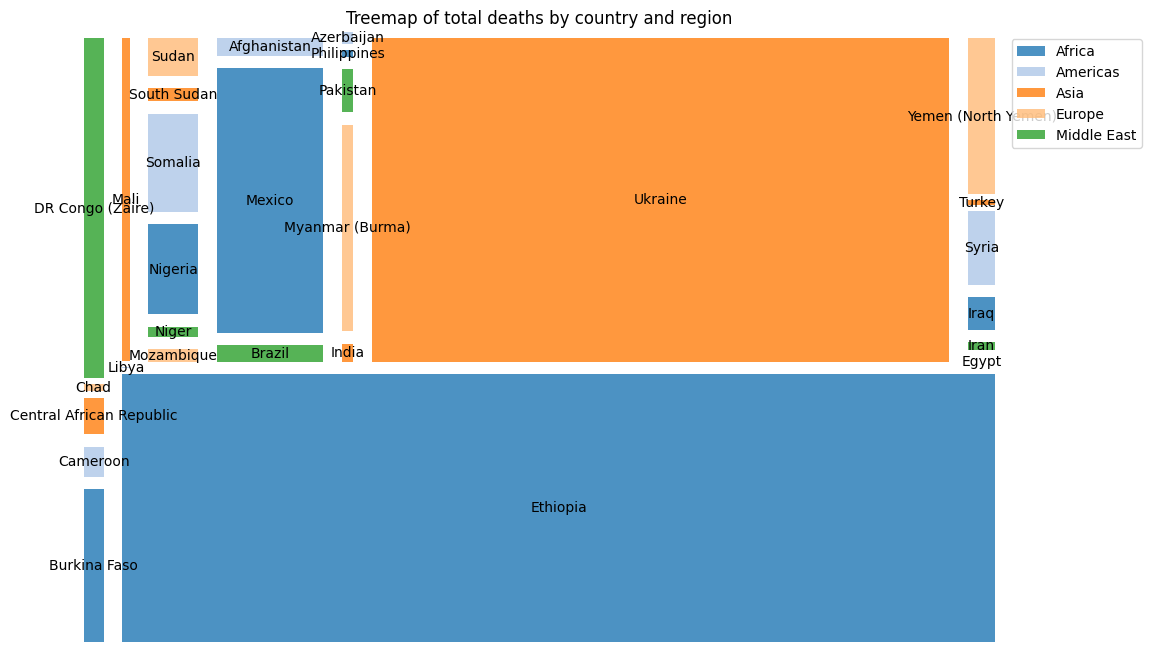

In [60]:
# Plotting the treemap
plt.figure(figsize=(12, 8))

# Define colors for regions
colors = plt.cm.tab20.colors[:len(df['region'].unique())]

# Create treemap rectangles
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    alpha=0.8,
    pad=True
)

# Add labels, title, and legend
plt.axis('off')
plt.title('Treemap of total deaths by country and region')
plt.legend(labels=pd.Series([x[0] for x in pivot_data.index]).unique(), loc='upper left', bbox_to_anchor=(1, 1))

In [34]:
pivot_data = pivot_data.drop(pivot_data[pivot_data['Total'] < 1000].index)

## Treemap for all 5 years

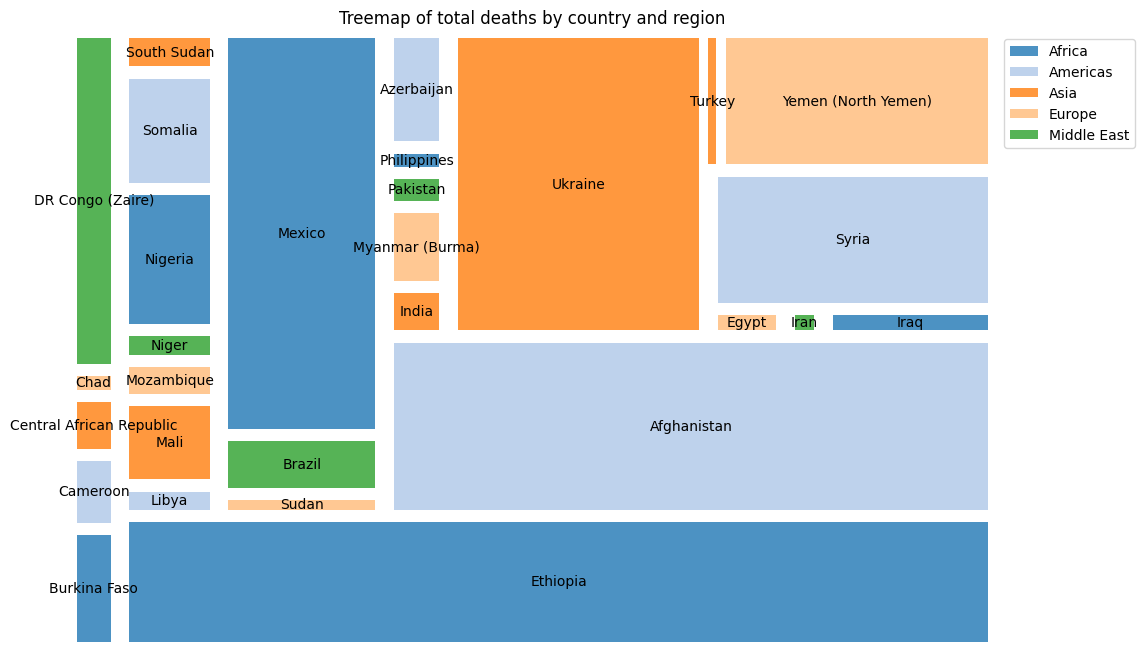

In [61]:
sizes = pivot_data['Total'].tolist()
labels = pivot_data.index.get_level_values(1).tolist()  # Country names
# Plotting the treemap
plt.figure(figsize=(12, 8))

# Define colors for regions
colors = plt.cm.tab20.colors[:len(df['region'].unique())]

# Create treemap rectangles
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    alpha=0.8,
    pad=True
)

# Add labels, title, and legend
plt.axis('off')
plt.title('Treemap of total deaths by country and region')
plt.legend(labels=pd.Series([x[0] for x in pivot_data.index]).unique(), loc='upper left', bbox_to_anchor=(1, 1))

In [62]:
# Function to plot treemap using data from a particular year.
def tree_by_year(year):
    assert year in range(2018, 2023)
    sizes = pivot_data['sum'][year].to_list()
    labels = pivot_data.index.get_level_values(1).tolist()  # Country names
    # Plotting the treemap
    plt.figure(figsize=(12, 8))

    # Define colors for regions
    colors = plt.cm.tab20.colors[:len(df['region'].unique())]

    # Create treemap rectangles
    squarify.plot(
        sizes=sizes,
        label=labels,
        color=colors,
        alpha=0.8,
        pad=True
    )

    # Add labels, title, and legend
    plt.axis('off')
    plt.title('Treemap of total deaths by country and region')
    plt.legend(labels=pd.Series([x[0] for x in pivot_data.index]).unique(), loc='upper left', bbox_to_anchor=(1, 1))

## Treemaps for each year, 2018-2022

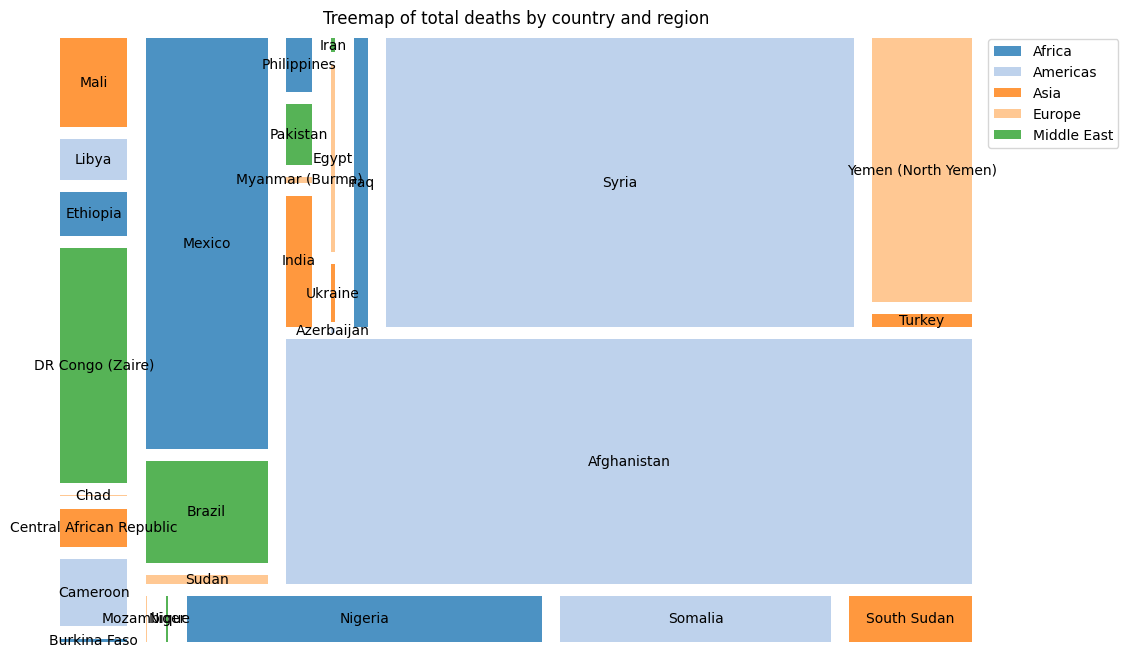

In [63]:
tree_by_year(2018)

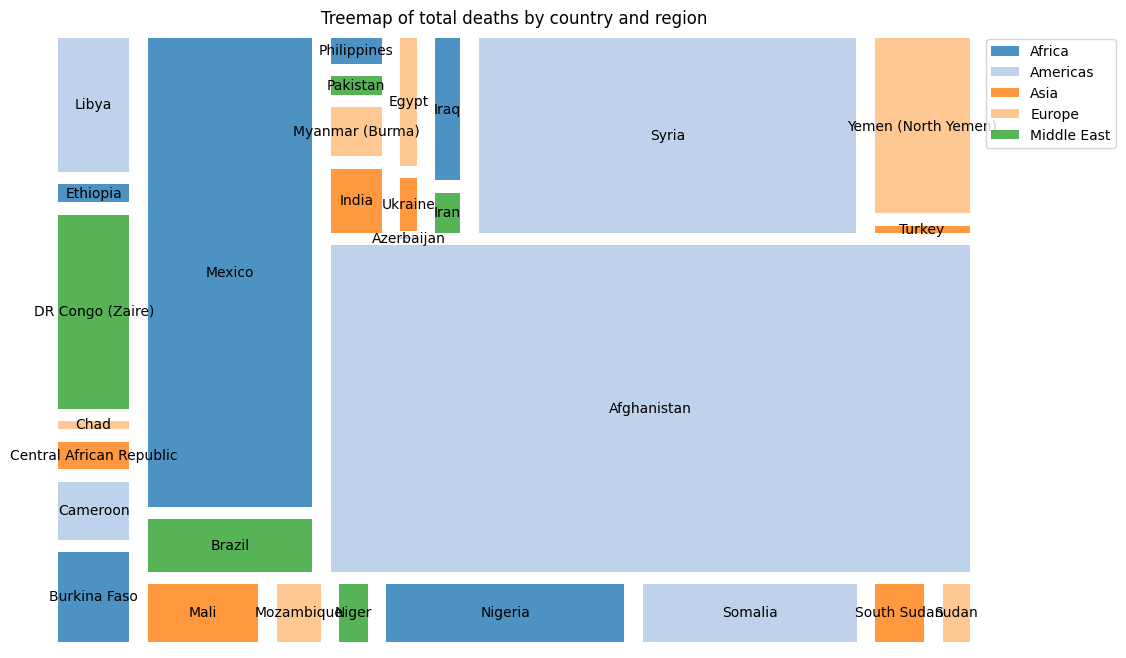

In [64]:
tree_by_year(2019)

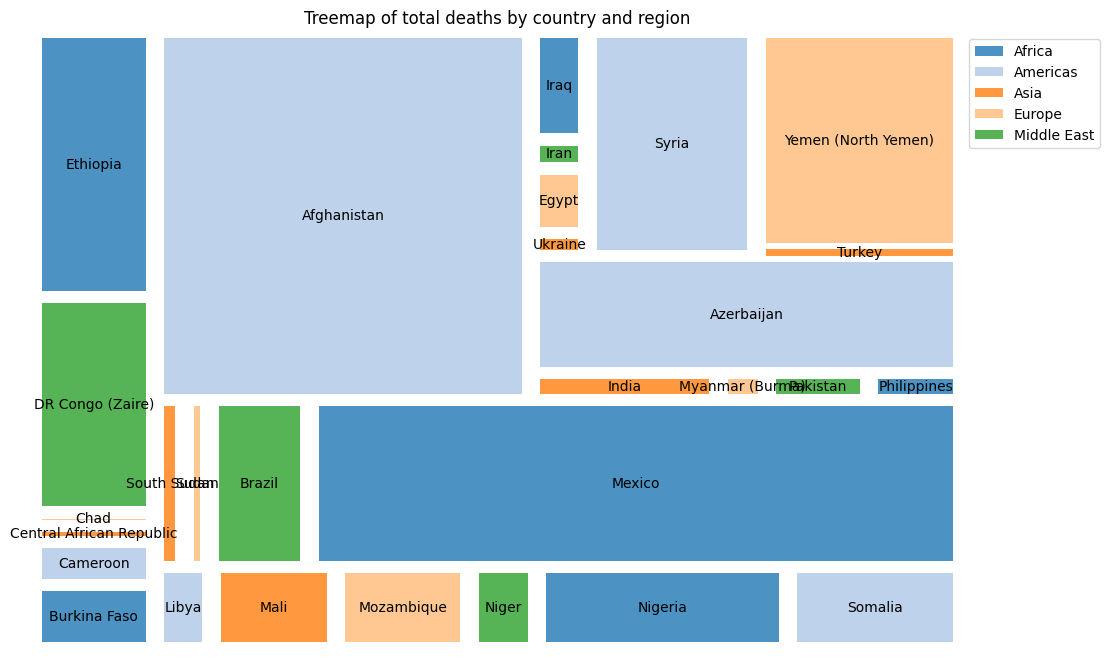

In [65]:
tree_by_year(2020)

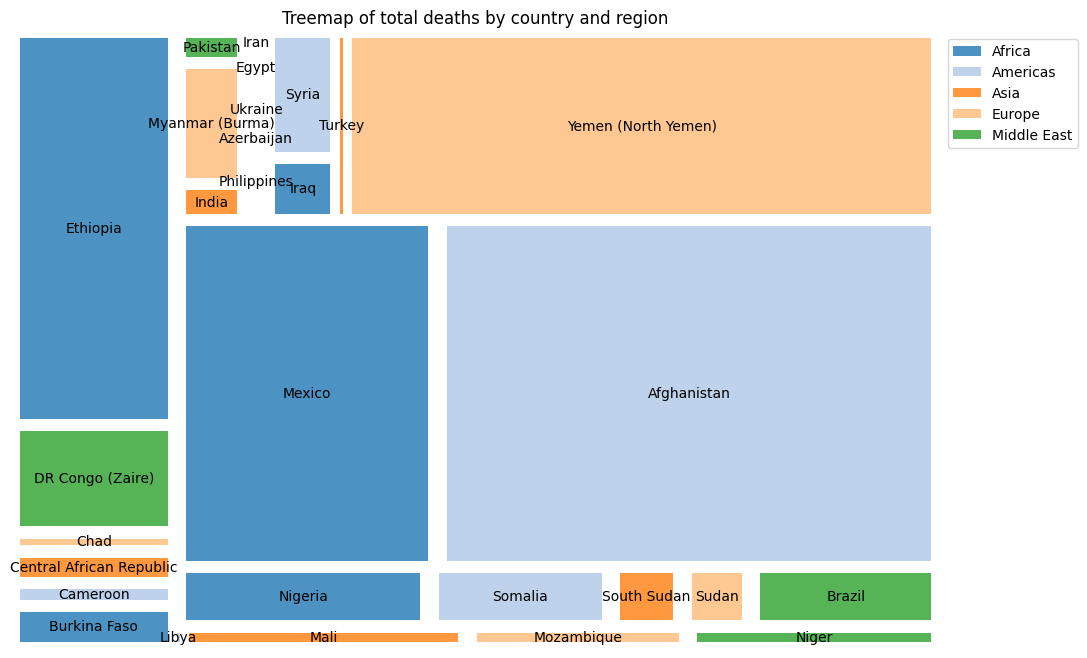

In [66]:
tree_by_year(2021)

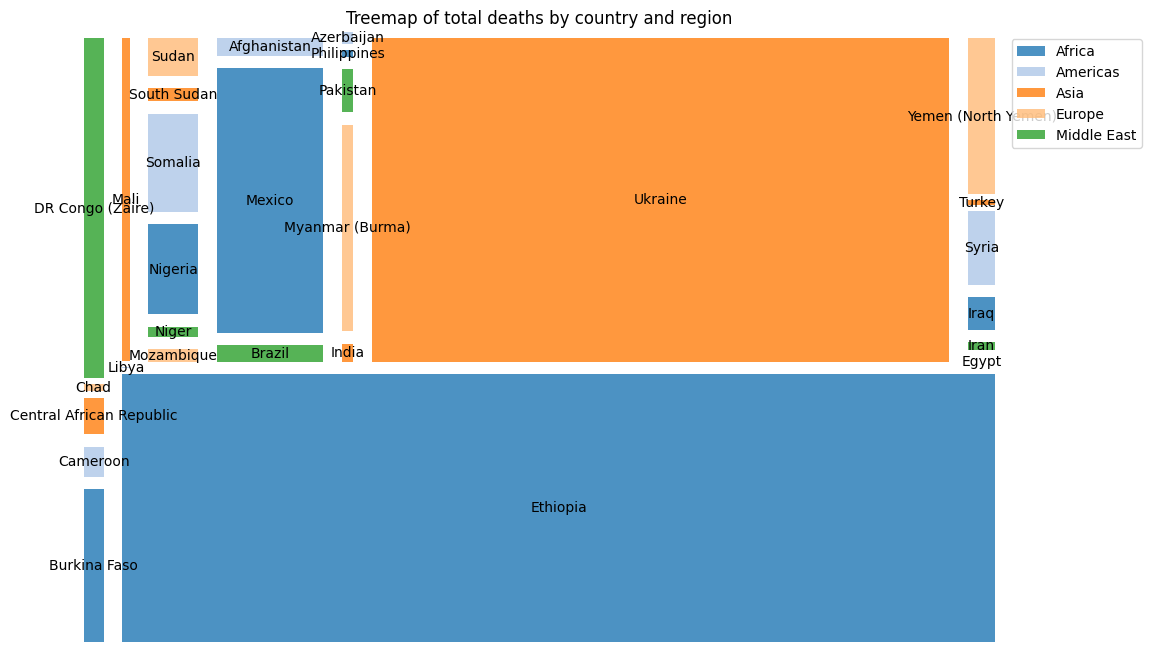

In [67]:
tree_by_year(2022)

In [24]:
df["country"].unique()

array(['Turkey', 'Syria', 'Burkina Faso', 'Cameroon', 'DR Congo (Zaire)',
       'Somalia', 'Ethiopia', 'Angola', 'Sudan', 'Niger', 'Rwanda',
       'Central African Republic', 'Tunisia', 'South Sudan', 'Iraq',
       'Egypt', 'Saudi Arabia', 'Yemen (North Yemen)', 'Afghanistan',
       'India', 'Pakistan', 'Philippines', 'Burundi', 'Algeria',
       'Colombia', 'Indonesia', 'Bangladesh', 'Myanmar (Burma)',
       'United Kingdom', 'Armenia', 'Russia (Soviet Union)', 'Azerbaijan',
       'Iran', 'Lebanon', 'Israel', 'Thailand', 'Ukraine', 'Mali',
       'Nigeria', 'Tajikistan', 'Kenya', 'Libya', 'South Africa',
       'Mexico', 'Brazil', 'Mozambique', 'Chad', 'Zimbabwe (Rhodesia)',
       'Ivory Coast', 'Uganda', 'Tanzania', 'Guinea', 'Togo',
       'Kingdom of eSwatini (Swaziland)', 'Madagascar (Malagasy)',
       'Liberia', 'Senegal', 'Paraguay', 'Honduras', 'El Salvador',
       'Peru', 'United States of America', 'Venezuela', 'Morocco',
       'Haiti', 'Benin', 'Djibouti', 'Ecuador

## Filter Data For Myanmar as an Example

In [25]:
myanmar_df = df.loc[df["country"] == "Myanmar (Burma)"]

In [26]:
myanmar_df = myanmar_df.loc[myanmar_df["year"] == 2021]

In [27]:
myanmar_df.shape

(847, 22)

## Perform Clustering Over Latitude-Longitude Within Myanmar

In [28]:
kmeans4 = KMeans(n_clusters=4, random_state=42)

X = myanmar_df[['latitude', 'longitude']]

kmeans4.fit(X)

kmeans4.labels_

c:\Users\HP\anaconda3\envs\mlds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\envs\mlds\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([2, 3, 1, 2, 2, 1, 2, 2, 0, 3, 1, 1, 0, 1, 1, 0, 2, 1, 3, 1, 0, 1,
       0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 3,
       1, 1, 1, 1, 0, 1, 1, 0, 3, 3, 3, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2,
       1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 3, 1,
       0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 3, 3, 0, 0, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2,
       2, 2, 1, 3, 3, 1, 1, 2, 1, 1, 1, 1, 3, 3, 0, 0, 3, 2, 2, 3, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 0, 0, 1, 1, 3, 1, 0, 1, 1, 1, 0, 1,

In [29]:
myanmar_df['cluster'] = kmeans4.labels_

In [30]:
myanmar_df.head()

,year,type_of_violence,side_a,side_b,number_of_sources,source_article,source_office,source_date,where_coordinates,latitude,...,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,cluster
9566,2021,State,Government of Myanmar (Burma),KIO,2,"""Kachin News Group,2021-07-04,KIA And PDF Atta...",Kachin News Group;The Irrawaddy,2021-07-04;2021-07-07,Thitseingon village,23.796980,...,2021-07-02,2021-07-02,4,0,0,0,4,4,4,2
9568,2021,One-Sided,NUG,Civilians,1,"""Myanmar Now,2021-07-05,Resistance fighters in...",Myanmar Now,2021-07-05,Bago district,17.732744,...,2021-07-04,2021-07-04,0,0,1,0,1,1,1,3
9569,2021,State,Government of Myanmar (Burma),NUG,8,"""The Irrawaddy,2021-07-07,Tabayin Villagers Ca...",The Irrawaddy;The Irrawaddy;The Irrawaddy;Myan...,2021-07-07;2021-07-04;2021-07-05;2021-07-06;20...,Tabayin township,22.660147,...,2021-07-02,2021-07-03,15,26,0,15,56,56,56,1
9574,2021,One-Sided,NUG,Civilians,1,"""Myanmar Now,2021-07-07,Eight village tract ad...",Myanmar Now,2021-07-07,Kawlin township,23.766019,...,2021-07-01,2021-07-01,0,0,1,0,1,1,1,2
9576,2021,State,Government of Myanmar (Burma),NUG,3,"""Myanmar Now,2021-07-07,Eight village tract ad...",Myanmar Now;Myanmar Now;The Irrawaddy,2021-07-07;2021-07-06;2021-07-07,Kokkogon village,23.680050,...,2021-07-04,2021-07-04,20,4,0,0,24,24,24,2


In [31]:
myanmar_df.to_csv("MyanmarClustered.csv")

## Explore The Clusters

In [32]:
myanmar_df['cluster'].value_counts()

1    464
3    142
0    128
2    113
Name: cluster, dtype: int64

In [33]:
myanmar_df[myanmar_df['cluster']==0].describe()

,year,number_of_sources,latitude,longitude,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,cluster
count,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0
mean,2021.0,1.859375,19.322006,96.930184,0.156250,0.218750,1.187500,0.640625,2.203125,9.257812,1.960938,0.0
std,0.0,2.426022,0.673752,0.562425,1.159945,0.709192,4.423897,2.583212,5.098030,16.424605,5.133497,0.0
min,2021.0,1.000000,17.896790,95.130840,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
25%,2021.0,1.000000,19.131111,97.014054,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
50%,2021.0,1.000000,19.531482,97.079654,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.0
75%,2021.0,2.000000,19.711192,97.227945,0.000000,0.000000,1.000000,0.000000,2.000000,9.250000,2.000000,0.0
max,2021.0,24.000000,20.782664,97.611889,12.000000,5.000000,45.000000,20.000000,45.000000,93.000000,45.000000,0.0


c:\Users\HP\anaconda3\envs\mlds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


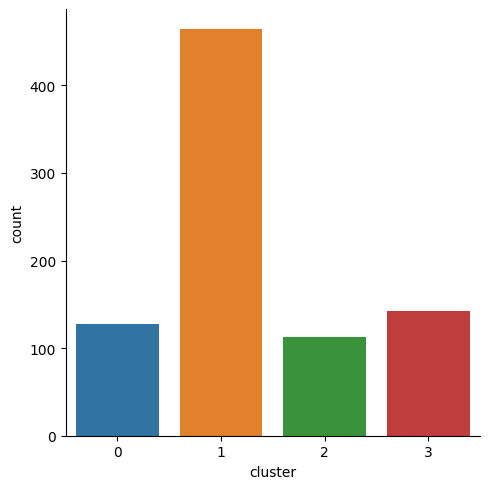

In [34]:
sns.catplot(data=myanmar_df, x='cluster', kind='count')

c:\Users\HP\anaconda3\envs\mlds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


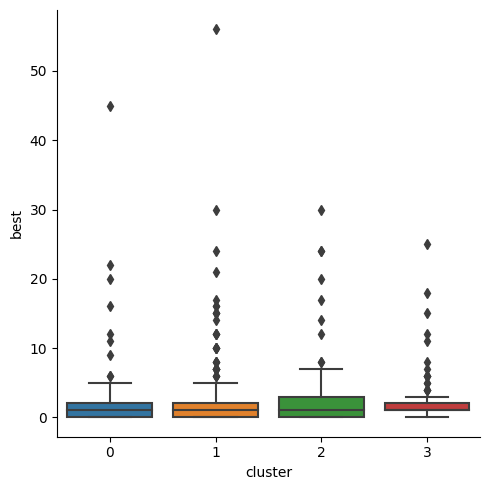

In [35]:
sns.catplot(data=myanmar_df, y='best', x='cluster', kind='box')